## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, how='inner', on ='Mouse ID')


# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
number_of_mice = merged_df['Mouse ID'].count()
number_of_mice

1893

In [7]:
merged_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_timepoint = merged_df.duplicated(subset= 'Mouse ID')
duplicate_timepoint.head()


0    False
1     True
2     True
3     True
4     True
dtype: bool

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 

In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df.drop_duplicates(subset='Mouse ID')

cleaned_df_groupedby = cleaned_df.groupby(['Drug Regimen'])
cleaned_df_groupedby.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
50,s508,Ramicane,Male,1,17,0,45.0,0
60,f966,Capomulin,Male,16,17,0,45.0,0
65,m546,Ramicane,Male,18,16,0,45.0,0
75,z578,Ramicane,Male,11,16,0,45.0,0
95,u364,Capomulin,Male,18,17,0,45.0,0


In [35]:
# Checking the number of mice in the clean DataFrame.
number_of_mice2 = cleaned_df['Mouse ID'].count()
number_of_mice2


249

## Summary Statistics

In [14]:
merged_df_grouped = merged_df.groupby(['Drug Regimen'])
print(merged_df_grouped)
merged_df_grouped.count().head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor_volume = round(merged_df['Tumor Volume (mm3)'].mean(),2)
median_tumor_volume = round(merged_df['Tumor Volume (mm3)'].median(),2)
std_tumor_volume = round(merged_df['Tumor Volume (mm3)'].std(),2)
sem_tumor_volume = round(merged_df['Tumor Volume (mm3)'].sem(),2)

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_stats_total = pd.DataFrame({'Mean Tumor Volume is': [mean_tumor_volume],
                                  'Median Tumor Volume is': [median_tumor_volume],
                                  'Standard Deviation of Tumor Volume is ': [std_tumor_volume],
                                   'SEM of Tumor Volume': [sem_tumor_volume]})
summary_stats_total.head()

,Mean Tumor Volume is,Median Tumor Volume is,Standard Deviation of Tumor Volume is,SEM of Tumor Volume
0,50.45,48.95,8.89,0.2


In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_df_by_regimen = merged_df.groupby(['Tumor Volume (mm3)'])


# This method produces everything in a single groupby function
grouped_df_by_regimen['Drug Regimen'].describe()

,count,unique,top,freq
Tumor Volume (mm3),,,,
22.050126,1,1,Ramicane,1
23.343598,1,1,Capomulin,1
24.365505,1,1,Ramicane,1
25.472143,1,1,Capomulin,1
26.546993,1,1,Ramicane,1
28.167397,1,1,Capomulin,1
28.328531,1,1,Capomulin,1
28.430964,1,1,Capomulin,1
28.484033,1,1,Capomulin,1


## Bar and Pie Charts

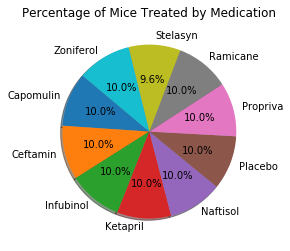

In [69]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
labels = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
count = cleaned_df_groupedby['Drug Regimen'].value_counts()
explode = (0.1,0,0,0)

plt.pie(count, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)

plt.title("Percentage of Mice Treated by Medication")

plt.show()

No handles with labels found to put in legend.


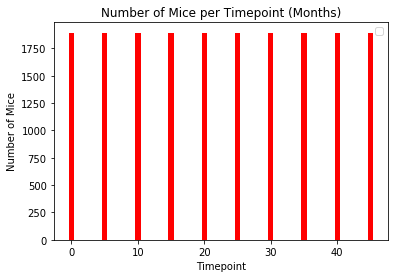

In [58]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = len(merged_df['Mouse ID'])
y_axis = merged_df['Timepoint']

plt.bar(y_axis,x_axis, color='r', align='center')
plt.xlabel('Timepoint')
plt.ylabel('Number of Mice')
plt.title('Number of Mice per Timepoint (Months)')

plt.show()             


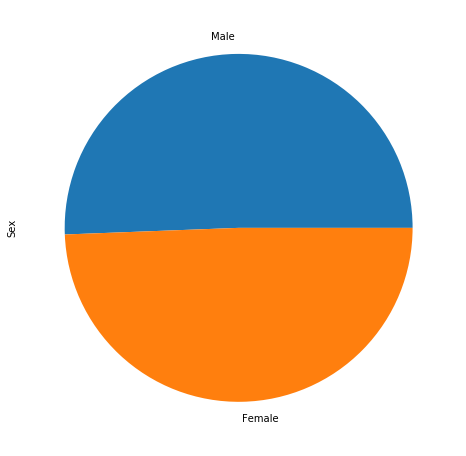

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = merged_df['Sex'].value_counts()

gender.plot(kind='pie', figsize=(8,8), subplots=True)

plt.show()


Text(0.5, 1.0, 'Percentage of Male and Female Mice')

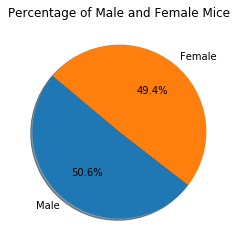

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = merged_df['Sex'].value_counts()
labels = ['Male', 'Female']

plt.pie(gender, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Percentage of Male and Female Mice")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
